In [1]:
import numpy as np
import pylab as plt
from aa_uv.io import hdf5_to_uvx
from aa_uv.postx import ApertureArray

test_data =  {
    'aavs2': ('test-data/aavs2/correlation_burst_100_20211113_14447_0.hdf5',
              'test-data/aavs2/correlation_burst_204_20211113_14653_0.hdf5' ),
    'aavs3': ('test-data/aavs3/correlation_burst_100_20240107_19437_0.hdf5',
              'test-data/aavs3/correlation_burst_204_20240107_19437_0.hdf5' ),
    'eda2':  ('test-data/eda2/correlation_burst_100_20211211_14167_0.hdf5',
              'test-data/eda2/correlation_burst_204_20211211_14373_0.hdf5' ),
}

2024-05-14 15:34:09.788 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:33 - Using internal config eda2
2024-05-14 15:34:10.183 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:203 - Conjugating data
2024-05-14 15:34:10.187 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:174 - Could not find expected keys in observation_info
2024-05-14 15:34:10.188 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:176 - <KeysViewHDF5 []>
2024-05-14 15:34:10.424 | INFO     | aa_uv.postx.calibration.holography:jishnu_phasecal:289 - Iter 1: Iteration phase std minima reached, breaking
2024-05-14 15:34:15.850 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:33 - Using internal config aavs2
2024-05-14 15:34:15.904 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:203 - Conjugating data
2024-05-14 15:34:15.906 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:174 - Could not find expected keys in observation_info
2024-05-14 15:34:15.907 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:176 - <KeysViewHDF5 []>
2024

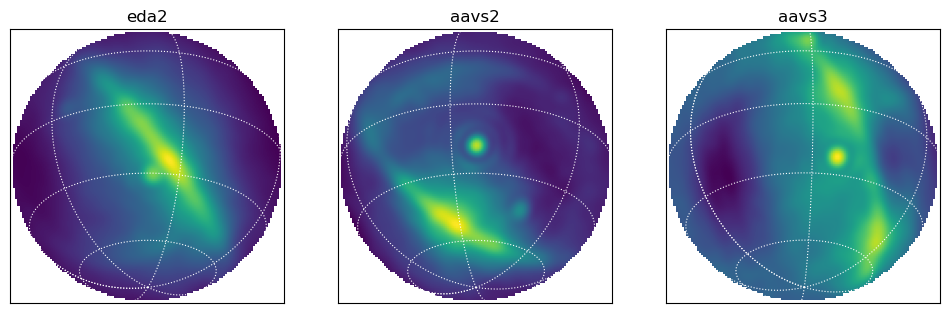

In [3]:
telescopes = ('eda2', 'aavs2', 'aavs3')
plt.figure(figsize=(12, 4))

for ii, telescope in enumerate(telescopes):
    uvx = hdf5_to_uvx(test_data[telescope][0], telescope_name=telescope)
    aa = ApertureArray(uvx)

    aa.holography.set_cal_src(aa.get_sun())
    cal = aa.holography.run_phasecal()
    aa.set_cal(cal)

    img = aa.make_image()
    aa.viewer.plot(img, sfunc=np.log, subplot_id=(1,3,ii+1), title=telescope)

plt.savefig('plots.png')

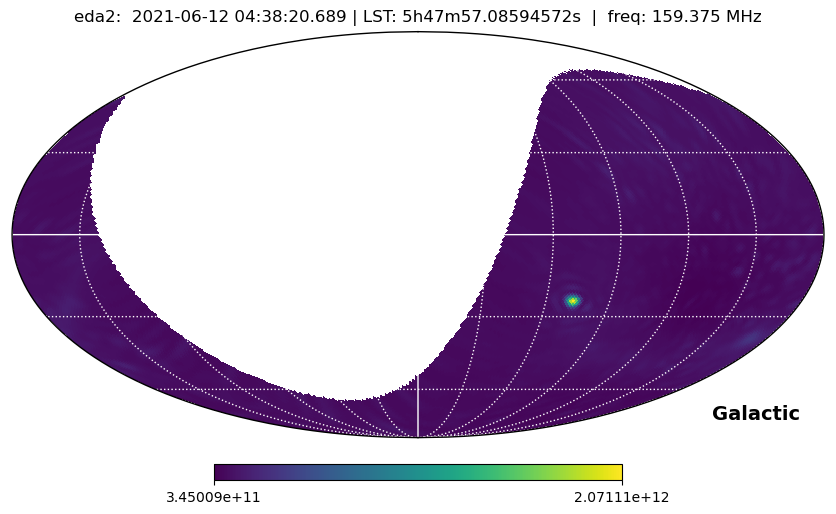

In [16]:
aa.viewer.mollview()

In [7]:
from aa_uv.postx.calibration import gsm_sim

In [1]:
from aa_uv.acacia import AcaciaStorage
from aa_uv.postx import ApertureArray

acacia = AcaciaStorage()
bucket = 'devel'
fpath  = 'test/correlation_burst_204_20210612_16699_0.uvx'
h5 = acacia.get_h5(bucket, fpath, debug=True)

uvx = acacia.read_uvx(bucket, fpath)

2024-05-09 14:26:35.674 | DEBUG    | aa_uv.acacia.acacia:get_h5:73 - Setting up h5py debug trace
2024-05-09 14:26:35.674 | DEBUG    | aa_uv.acacia.acacia:get_url:67 - URL: https://ingest.pawsey.org.au/devel/test/correlation_burst_204_20210612_16699_0.uvx


In [6]:
aa = ApertureArray(uvx)

In [9]:
aa.holography.set_cal_src(aa.get_sun())

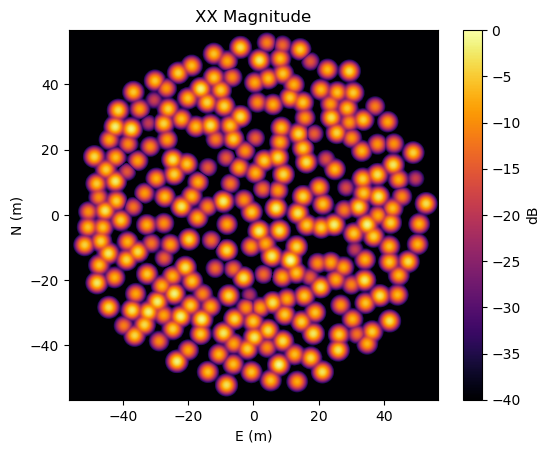

In [12]:
#aa = ApertureArray(uvx)
import pylab as plt
#aa.holography.set_cal_src(aa.get_sun())
holo_dict = aa.holography.run_selfholo()
aa.holography.plot_aperture(plot_type='mag')
plt.show()

In [3]:
test_data = 'test-data/aavs3/correlation_burst_100_20240107_19437_0.hdf5'
uvx = hdf5_to_uvx(test_data, telescope_name='aavs3')
aa = ApertureArray(uvx)

2024-05-10 15:23:15.099 | INFO     | aa_uv.io.to_uvx:load_observation_metadata:33 - Using internal config aavs3
2024-05-10 15:23:15.489 | INFO     | aa_uv.datamodel.uvx:create_visibility_array:203 - Conjugating data
2024-05-10 15:23:15.492 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:174 - Could not find expected keys in observation_info
2024-05-10 15:23:15.492 | WARNING  | aa_uv.io.to_uvx:hdf5_to_uvx:176 - <KeysViewHDF5 []>


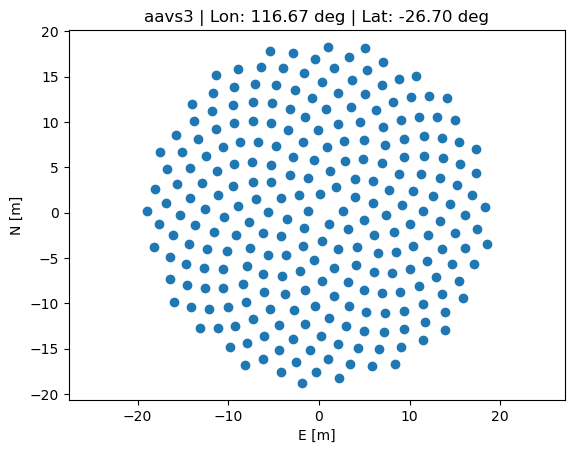

In [4]:
aa.plotting.plot_antennas()

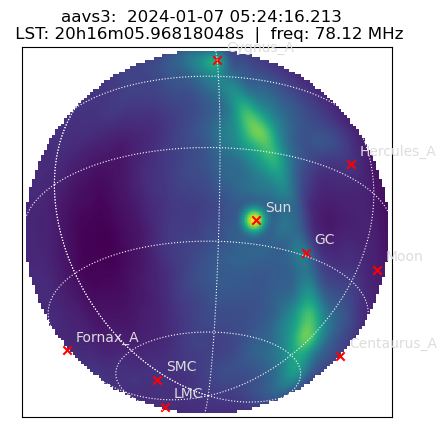

In [16]:
img = aa.make_image()
aa.viewer.plot(img, overlay_srcs=True)

In [20]:
from aa_uv.postx import sky_model
import pylab as plt

In [14]:
sm = sky_model.generate_skycat(aa)

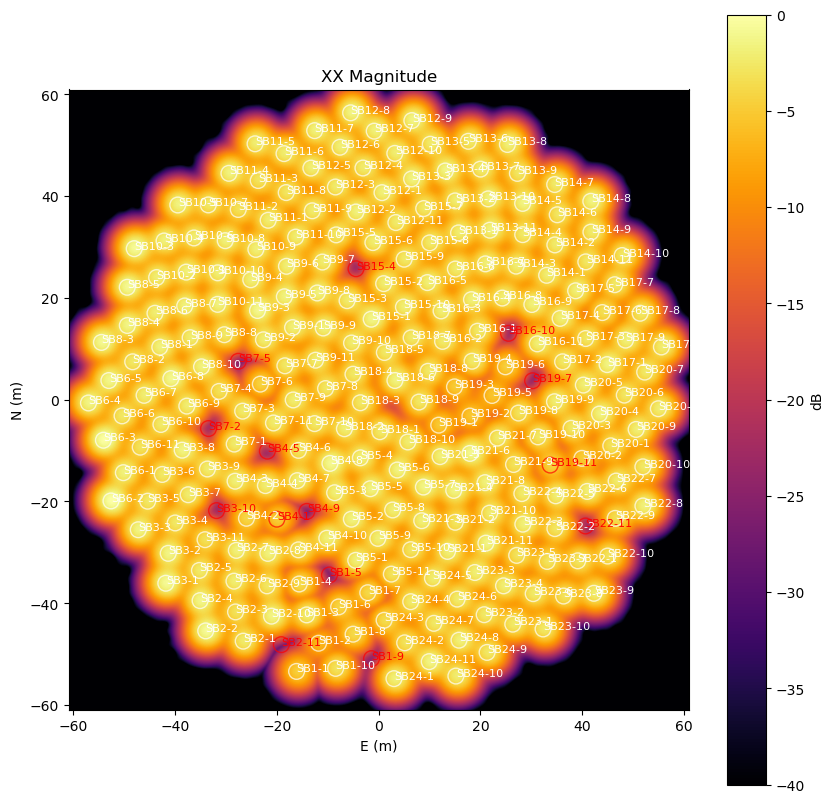

In [21]:
plt.figure(figsize=(10,10))
aa.holography.set_cal_src(aa.get_sun())
aa.holography.run_selfholo()
aa.holography.plot_aperture(annotate=True)

In [8]:
uvx.data

<xarray.DataArray (time: 1, frequency: 1, baseline: 32896, polarization: 4)>
array([[[[ 5.19224352e+08+0.0000000e+00j,
           1.59333560e+07+6.9698880e+06j,
           1.59333560e+07-6.9698890e+06j,
           1.27387738e+09+0.0000000e+00j],
         [-7.35387000e+05+1.3377605e+07j,
           4.98870200e+06-3.1911070e+06j,
           1.48854200e+06+7.2020600e+05j,
          -4.86486000e+05+3.8798328e+07j],
         [-3.63579080e+07-3.0757572e+07j,
           2.34306640e+07-1.1523972e+07j,
           1.30155640e+07-2.2524288e+07j,
           4.05058800e+07-8.3969488e+07j],
         ...,
         [ 1.86250637e+09+0.0000000e+00j,
           4.13686480e+07+1.7634728e+07j,
           4.13686480e+07-1.7634728e+07j,
           2.64334182e+09+0.0000000e+00j],
         [ 7.85522688e+08+2.2681619e+08j,
           8.31512960e+07+3.9087328e+07j,
           7.83135600e+07-1.6913722e+07j,
           1.01604819e+09+3.2393584e+08j],
         [ 2.17479475e+09+0.0000000e+00j,
           1.01540264e+08+6.0679172e+07j,
           1.01540264e+08-6.0679188e+07j,
           2.72211840e+09+0.0000000e+00j]]]], dtype=complex64)
Coordinates:
  * time          (time) object MultiIndex
  * mjd           (time) float64 5.956e+04
  * lst           (time) float64 17.05
  * unix          (time) float64 1.639e+09
  * polarization  (polarization) <U2 'XX' 'XY' 'YX' 'YY'
  * baseline      (baseline) object MultiIndex
  * ant1          (baseline) int64 0 0 0 0 0 0 0 ... 252 253 253 253 254 254 255
  * ant2          (baseline) int64 0 1 2 3 4 5 6 ... 255 253 254 255 254 255 255
  * frequency     (frequency) float64 7.812e+07
Attributes:
    unit:     uncalib

In [10]:
uvx.data.time.mjd

<xarray.DataArray 'mjd' (time: 1)>
array([59559.163986])
Coordinates:
  * time     (time) object MultiIndex
  * mjd      (time) float64 5.956e+04
  * lst      (time) float64 17.05
  * unix     (time) float64 1.639e+09